# Insurance Analytics Dashboard Project

This notebook performs comprehensive analysis of insurance data, including data cleaning,
exploratory data analysis, customer segmentation, and fraud detection.

## Project Overview
This analysis aims to derive actionable insights from insurance data to help:
- Understand customer demographics and behavior
- Identify fraud patterns
- Optimize premium pricing
- Improve risk assessment
- Segment customers for targeted services

## Analysis Structure
The analysis is organized into the following phases:
1. Data Loading and Initial Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Customer Segmentation
5. Fraud Analysis
6. Premium and Claims Analysis
7. Visualization and Dashboard Components

Author: Sechaba Mohlabeng

## Phase 1: Setup and Data Loading

In this first phase, we will:
1. Import all necessary libraries for our analysis
2. Configure display and visualization settings
3. Load our insurance dataset
4. Perform initial data examination

### 1.1 Library Imports
We'll import the following libraries:
- pandas: for data manipulation and analysis
- numpy: for numerical operations
- matplotlib & seaborn: for static visualizations
- plotly: for interactive visualizations
- scikit-learn: for machine learning operations

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Configure display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Format floats

# Set visualization styles
plt.style.use('default') 
sns.set_theme() 
sns.set_palette("husl")

# Enable interactive plotting for Plotly
%matplotlib inline

### 1.2 Data Loading and Initial Examination

In this step, we will:
- Load the insurance dataset from our CSV file
- Examine the basic structure and properties of our data
- Get initial statistics about our variables

This examination will help us:
- Understand the shape and size of our dataset
- Identify the data types of each column
- Get a quick overview of the value ranges
- Spot any immediate data quality issues

Let's start by loading the data and performing some basic checks:

In [4]:
# Load the insurance dataset
df = pd.read_csv('Synthetic_Insurance_Data_Realistic_20000.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of records: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print("\nDataset Info:")
print("-" * 50)
df.info()

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print("-" * 50)
display(df.head())

# Display basic statistics
print("\nBasic Statistics of Numerical Columns:")
print("-" * 50)
display(df.describe())

Dataset Overview:
--------------------------------------------------
Number of records: 20000
Number of features: 14

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Policy_Number            20000 non-null  object
 1   Policy_Bind_Date         20000 non-null  object
 2   Policy_CLS               20000 non-null  object
 3   Policy_Annual_Premium    20000 non-null  int64 
 4   Umbrella_Limit           20000 non-null  int64 
 5   Auto_Make                20000 non-null  object
 6   Auto_Model               20000 non-null  object
 7   Insured_Education_Level  20000 non-null  object
 8   Policy_Deductible        20000 non-null  int64 
 9   Insured_Occupation       20000 non-null  object
 10  Insured_Hobbies          20000 non-null  object
 11  Capital_Gains 

,Policy_Number,Policy_Bind_Date,Policy_CLS,Policy_Annual_Premium,Umbrella_Limit,Auto_Make,Auto_Model,Insured_Education_Level,Policy_Deductible,Insured_Occupation,Insured_Hobbies,Capital_Gains,Capital_Loss,Fraud_Reported
0,31244558,2022-05-04,500K,3754,0,Subaru,SUV,High School,1000,Technician,Sports,629,3195,N
1,31bd615a,2021-12-17,1M,1363,0,BMW,Hatchback,Master's,1000,Manager,Gaming,8941,2909,N
2,b2d29262,2024-08-17,100K,4453,1000000,Subaru,Convertible,Associate's,500,Technician,Sports,390,4452,N
3,fb8d83d4,2021-05-26,500K,3608,0,Honda,Convertible,Bachelor's,500,Lawyer,Cooking,3757,852,N
4,ab6c18a3,2020-06-06,500K,3555,0,Mercedes,Hatchback,Associate's,1000,Salesperson,Photography,1284,3415,N



Basic Statistics of Numerical Columns:
--------------------------------------------------


,Policy_Annual_Premium,Umbrella_Limit,Policy_Deductible,Capital_Gains,Capital_Loss
count,20000.00,20000.00,20000.00,20000.00,20000.00
mean,2750.14,348050.00,851.92,5041.27,2499.84
std,1293.88,525023.79,450.50,2892.96,1446.54
min,500.00,0.00,500.00,0.00,0.00
25%,1635.00,0.00,500.00,2528.75,1242.00
50%,2753.50,0.00,1000.00,5074.50,2497.00
75%,3863.00,500000.00,1000.00,7546.25,3750.00
max,4999.00,2000000.00,2000.00,9999.00,4999.00


### 1.3 Initial Data Analysis Summary

From our initial examination, we can observe:

1. **Dataset Size**:
   - 20,000 records
   - 14 features (columns)

2. **Data Types**:
   - 5 numerical columns (int64)
   - 9 categorical columns (object)

3. **Key Features**:
   - Policy information (Number, Bind Date, CLS, Premium, Deductible)
   - Vehicle information (Make, Model)
   - Insured person details (Education, Occupation, Hobbies)
   - Financial information (Capital Gains/Loss)
   - Target variable: Fraud_Reported (Y/N)

4. **Data Quality**:
   - No missing values (all columns show 20,000 non-null counts)
   - Policy_Bind_Date needs to be converted to datetime
   - Monetary values are stored as integers

Let's examine the distributions and unique values in our categorical columns:

In [5]:
# Analyze categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Variables Analysis:")
print("-" * 50)
for col in categorical_columns:
    print(f"\n{col} - Unique Values:")
    print(df[col].value_counts())
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 30)

# Convert and analyze the date column
df['Policy_Bind_Date'] = pd.to_datetime(df['Policy_Bind_Date'])
print("\nPolicy Bind Date Range:")
print("-" * 50)
print(f"Earliest date: {df['Policy_Bind_Date'].min()}")
print(f"Latest date: {df['Policy_Bind_Date'].max()}")

Categorical Variables Analysis:
--------------------------------------------------

Policy_Number - Unique Values:
Policy_Number
8d5a87bc    1
648c4993    1
452ac8ba    1
3859985e    1
f1153e70    1
           ..
ab6c18a3    1
fb8d83d4    1
b2d29262    1
31bd615a    1
31244558    1
Name: count, Length: 20000, dtype: int64
Number of unique values: 20000
------------------------------

Policy_Bind_Date - Unique Values:
Policy_Bind_Date
2022-07-29    22
2022-12-14    22
2023-02-18    22
2021-09-11    22
2020-12-12    22
              ..
2020-11-18     3
2022-02-15     3
2022-09-26     2
2020-01-08     2
2021-09-01     2
Name: count, Length: 1804, dtype: int64
Number of unique values: 1804
------------------------------

Policy_CLS - Unique Values:
Policy_CLS
100K    5097
1M      4993
250K    4987
500K    4923
Name: count, dtype: int64
Number of unique values: 4
------------------------------

Auto_Make - Unique Values:
Auto_Make
Chevrolet     2309
Subaru        2272
Ford          2260
Toy

### 1.4 Data Distribution Analysis

Our categorical analysis reveals several important insights:

1. **Policy Information**:
   - Each policy has a unique identifier (20,000 unique Policy_Numbers)
   - Policies are distributed across 4 coverage levels (CLS):
     * 100K: ~25.5%
     * 1M: ~25%
     * 250K: ~25%
     * 500K: ~24.5%

2. **Vehicle Distribution**:
   - 9 car manufacturers, fairly evenly distributed (~2,200 each)
   - 6 vehicle types with balanced distribution (~3,300 each)

3. **Customer Demographics**:
   - Education levels show a pyramid structure:
     * High School: 40%
     * Bachelor's: 25%
     * Associate's: 20%
     * Master's: 10%
     * PhD: 5%
   - 8 occupation categories, evenly distributed (~2,500 each)
   - 8 hobby categories, also evenly distributed

4. **Fraud Cases**:
   - 2,032 fraud cases (10.16% of total)
   - 17,968 non-fraud cases (89.84%)

5. **Time Range**:
   - Policies span from January 2020 to December 2024
   - Relatively even distribution across dates

Let's now analyze the numerical variables in more detail:

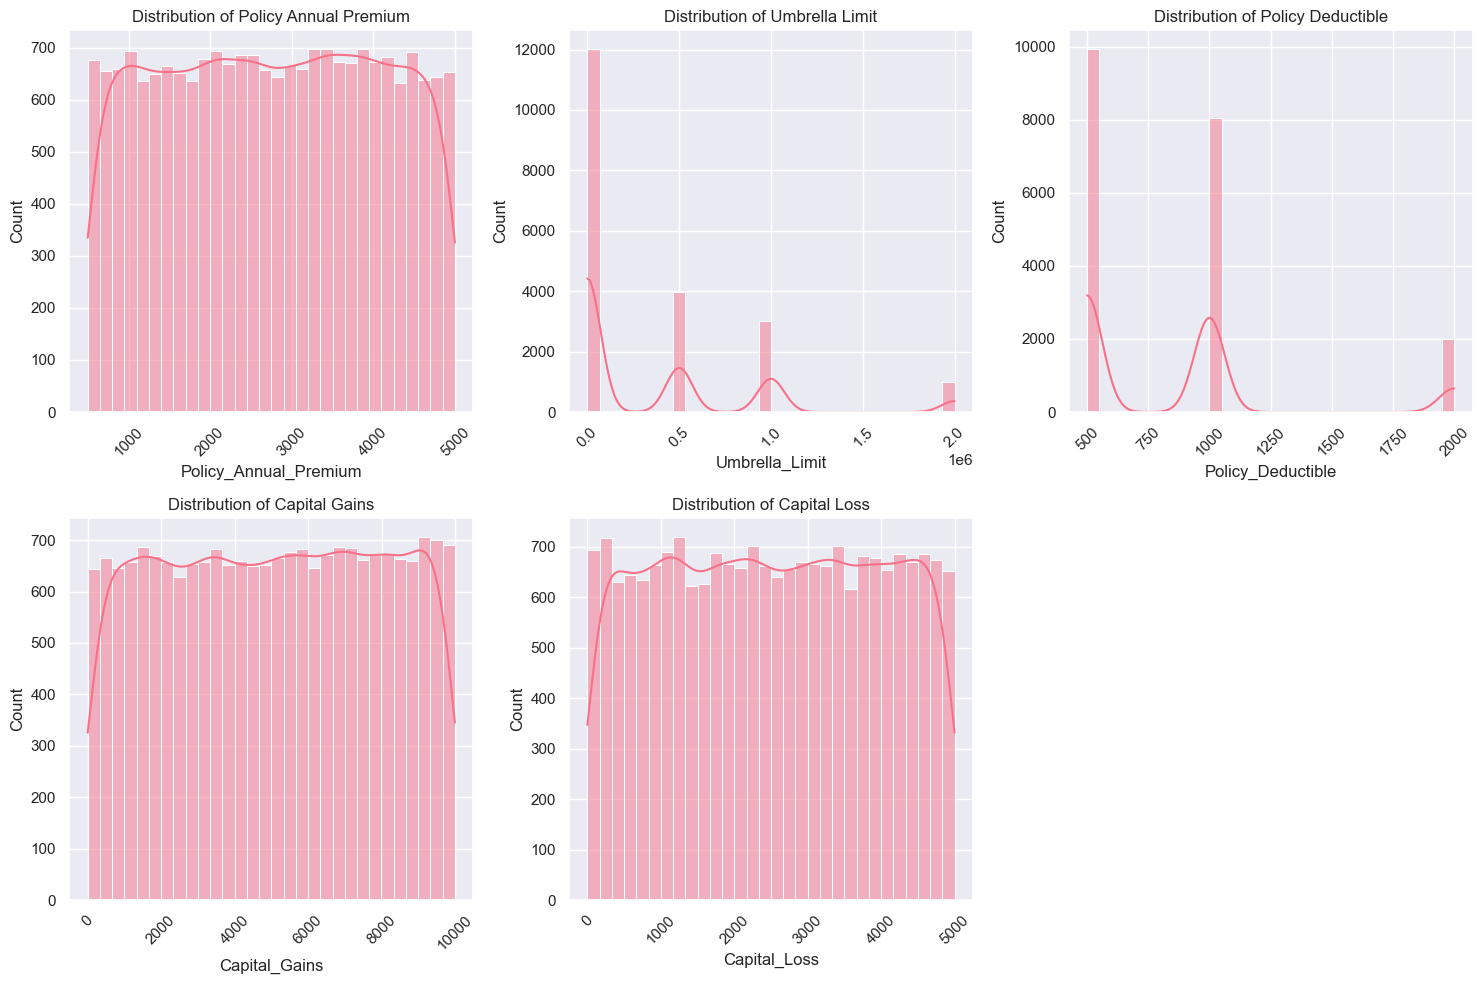

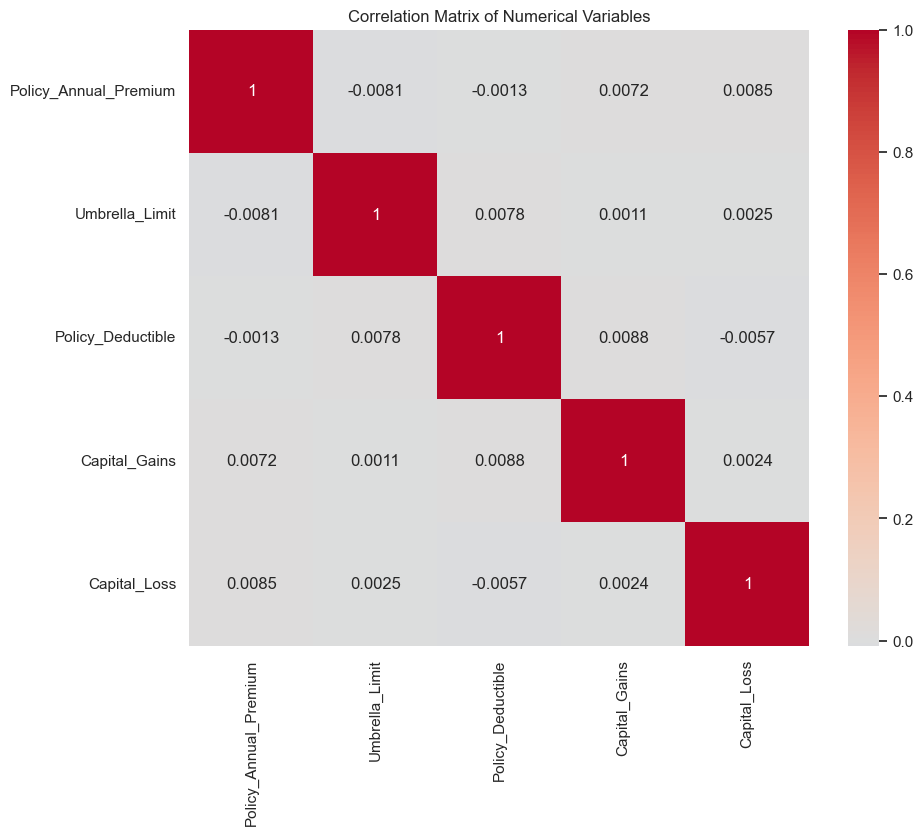

In [6]:
# Set up the visualization layout
plt.figure(figsize=(15, 10))

# Create subplots for numerical variables
numerical_cols = ['Policy_Annual_Premium', 'Umbrella_Limit', 'Policy_Deductible', 
                 'Capital_Gains', 'Capital_Loss']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col.replace("_", " ")}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Phase 2: Data Cleaning and Preprocessing

Based on our initial analysis, we need to:

1. **Data Type Conversions**:
   - Convert Policy_Bind_Date to datetime (already done)
   - Convert monetary values to float for better analysis
   - Create categorical encodings for machine learning

2. **Feature Engineering**:
   - Extract year and month from Policy_Bind_Date
   - Calculate policy age
   - Create premium per coverage ratio
   - Group education levels into broader categories

3. **Data Standardization**:
   - Scale numerical features
   - Handle any extreme values

Let's start with data type conversions and feature engineering:

In [7]:
# Create a copy of the dataframe for cleaning
df_cleaned = df.copy()

# Convert monetary values to float and scale to thousands
monetary_columns = ['Policy_Annual_Premium', 'Capital_Gains', 'Capital_Loss']
for col in monetary_columns:
    df_cleaned[f'{col}_K'] = df_cleaned[col] / 1000

# Extract time-based features
df_cleaned['Policy_Year'] = df_cleaned['Policy_Bind_Date'].dt.year
df_cleaned['Policy_Month'] = df_cleaned['Policy_Bind_Date'].dt.month

# Calculate policy age in months
current_date = pd.Timestamp('2024-03-14')  # Using current date
df_cleaned['Policy_Age_Months'] = ((current_date - df_cleaned['Policy_Bind_Date']).dt.days / 30).round()

# Create premium per coverage ratio
coverage_map = {'100K': 100000, '250K': 250000, '500K': 500000, '1M': 1000000}
df_cleaned['Coverage_Amount'] = df_cleaned['Policy_CLS'].map(coverage_map)
df_cleaned['Premium_Coverage_Ratio'] = (df_cleaned['Policy_Annual_Premium'] / df_cleaned['Coverage_Amount']) * 1000

# Group education levels
education_map = {
    'High School': 'Basic',
    'Associate\'s': 'Basic',
    'Bachelor\'s': 'Advanced',
    'Master\'s': 'Advanced',
    'PhD': 'Advanced'
}
df_cleaned['Education_Group'] = df_cleaned['Insured_Education_Level'].map(education_map)

# Display the first few rows of new features
print("New Features Overview:")
print("-" * 50)
display(df_cleaned[['Policy_Year', 'Policy_Month', 'Policy_Age_Months', 
                    'Premium_Coverage_Ratio', 'Education_Group']].head())

# Basic statistics of new numerical features
print("\nNew Numerical Features Statistics:")
print("-" * 50)
display(df_cleaned[['Policy_Age_Months', 'Premium_Coverage_Ratio']].describe())

New Features Overview:
--------------------------------------------------


,Policy_Year,Policy_Month,Policy_Age_Months,Premium_Coverage_Ratio,Education_Group
0,2022,5,23.00,7.51,Basic
1,2021,12,27.00,1.36,Advanced
2,2024,8,-5.00,44.53,Basic
3,2021,5,34.00,7.22,Advanced
4,2020,6,46.00,7.11,Basic



New Numerical Features Statistics:
--------------------------------------------------


,Policy_Age_Months,Premium_Coverage_Ratio
count,20000.00,20000.00
mean,21.12,11.74
std,17.42,11.97
min,-9.00,0.50
25%,6.00,3.48
50%,21.00,7.09
75%,36.00,15.76
max,51.00,49.98


### 2.2 Analysis of New Features

Our newly created features reveal several insights:

1. **Policy Age Distribution**:
   - Range: -9 to 51 months
   - Negative values indicate future policies (up to Dec 2024)
   - Median age: 21 months
   - Most policies are between 6 and 36 months old

2. **Premium Coverage Ratio** (Premium per $1000 of coverage):
   - Minimum: $0.50 per $1000 coverage
   - Maximum: $49.98 per $1000 coverage
   - Median: $7.09 per $1000 coverage
   - Shows significant variation in pricing

Let's now prepare our data for modeling by:
1. Encoding categorical variables
2. Handling the future dates
3. Scaling numerical features

In [8]:
# Create dummy variables for categorical columns
categorical_cols = ['Auto_Make', 'Auto_Model', 'Insured_Occupation', 
                   'Insured_Hobbies', 'Education_Group']

# Create dummy variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Handle future dates by capping Policy_Age_Months at 0
df_encoded['Policy_Age_Months'] = df_encoded['Policy_Age_Months'].clip(lower=0)

# Select numerical features for scaling
numerical_features = ['Policy_Annual_Premium_K', 'Umbrella_Limit', 'Policy_Deductible',
                     'Capital_Gains_K', 'Capital_Loss_K', 'Policy_Age_Months',
                     'Premium_Coverage_Ratio']

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Display the first few rows of processed data
print("Processed Data Overview:")
print("-" * 50)
display(df_encoded.head())

# Show shape of processed dataset
print(f"\nFinal dataset shape: {df_encoded.shape}")
print(f"Number of features after encoding: {df_encoded.shape[1] - 1}")  # -1 for target variable

Processed Data Overview:
--------------------------------------------------


,Policy_Number,Policy_Bind_Date,Policy_CLS,Policy_Annual_Premium,Umbrella_Limit,Insured_Education_Level,Policy_Deductible,Capital_Gains,Capital_Loss,Fraud_Reported,Policy_Annual_Premium_K,Capital_Gains_K,Capital_Loss_K,Policy_Year,Policy_Month,Policy_Age_Months,Coverage_Amount,Premium_Coverage_Ratio,Auto_Make_Chevrolet,Auto_Make_Ford,Auto_Make_Honda,Auto_Make_Mercedes,Auto_Make_Nissan,Auto_Make_Subaru,Auto_Make_Toyota,Auto_Make_Volkswagen,Auto_Model_Coupe,Auto_Model_Hatchback,Auto_Model_SUV,Auto_Model_Sedan,Auto_Model_Truck,Insured_Occupation_Doctor,Insured_Occupation_Engineer,Insured_Occupation_Lawyer,Insured_Occupation_Manager,Insured_Occupation_Salesperson,Insured_Occupation_Teacher,Insured_Occupation_Technician,Insured_Hobbies_Gaming,Insured_Hobbies_Gardening,Insured_Hobbies_Hiking,Insured_Hobbies_Photography,Insured_Hobbies_Reading,Insured_Hobbies_Sports,Insured_Hobbies_Traveling,Education_Group_Basic
0,31244558,2022-05-04,500K,3754,-0.66,High School,0.33,629,3195,N,0.78,-1.53,0.48,2022,5,0.07,500000,-0.35,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
1,31bd615a,2021-12-17,1M,1363,-0.66,Master's,0.33,8941,2909,N,-1.07,1.35,0.28,2021,12,0.32,1000000,-0.87,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
2,b2d29262,2024-08-17,100K,4453,1.24,Associate's,-0.78,390,4452,N,1.32,-1.61,1.35,2024,8,-1.33,100000,2.74,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True
3,fb8d83d4,2021-05-26,500K,3608,-0.66,Bachelor's,-0.78,3757,852,N,0.66,-0.44,-1.14,2021,5,0.74,500000,-0.38,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,ab6c18a3,2020-06-06,500K,3555,-0.66,Associate's,0.33,1284,3415,N,0.62,-1.30,0.63,2020,6,1.47,500000,-0.39,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True



Final dataset shape: (20000, 46)
Number of features after encoding: 45


## Phase 3: Exploratory Data Analysis (EDA)

Our processed dataset now contains:
- 20,000 records
- 46 total columns (45 features + 1 target)
- Encoded categorical variables:
  * Auto Makes (8 binary columns)
  * Auto Models (5 binary columns)
  * Occupations (7 binary columns)
  * Hobbies (7 binary columns)
  * Education Group (1 binary column)
- Scaled numerical features:
  * Policy_Annual_Premium_K
  * Umbrella_Limit
  * Policy_Deductible
  * Capital_Gains_K
  * Capital_Loss_K
  * Policy_Age_Months
  * Premium_Coverage_Ratio

Let's explore relationships between these features and fraud detection:

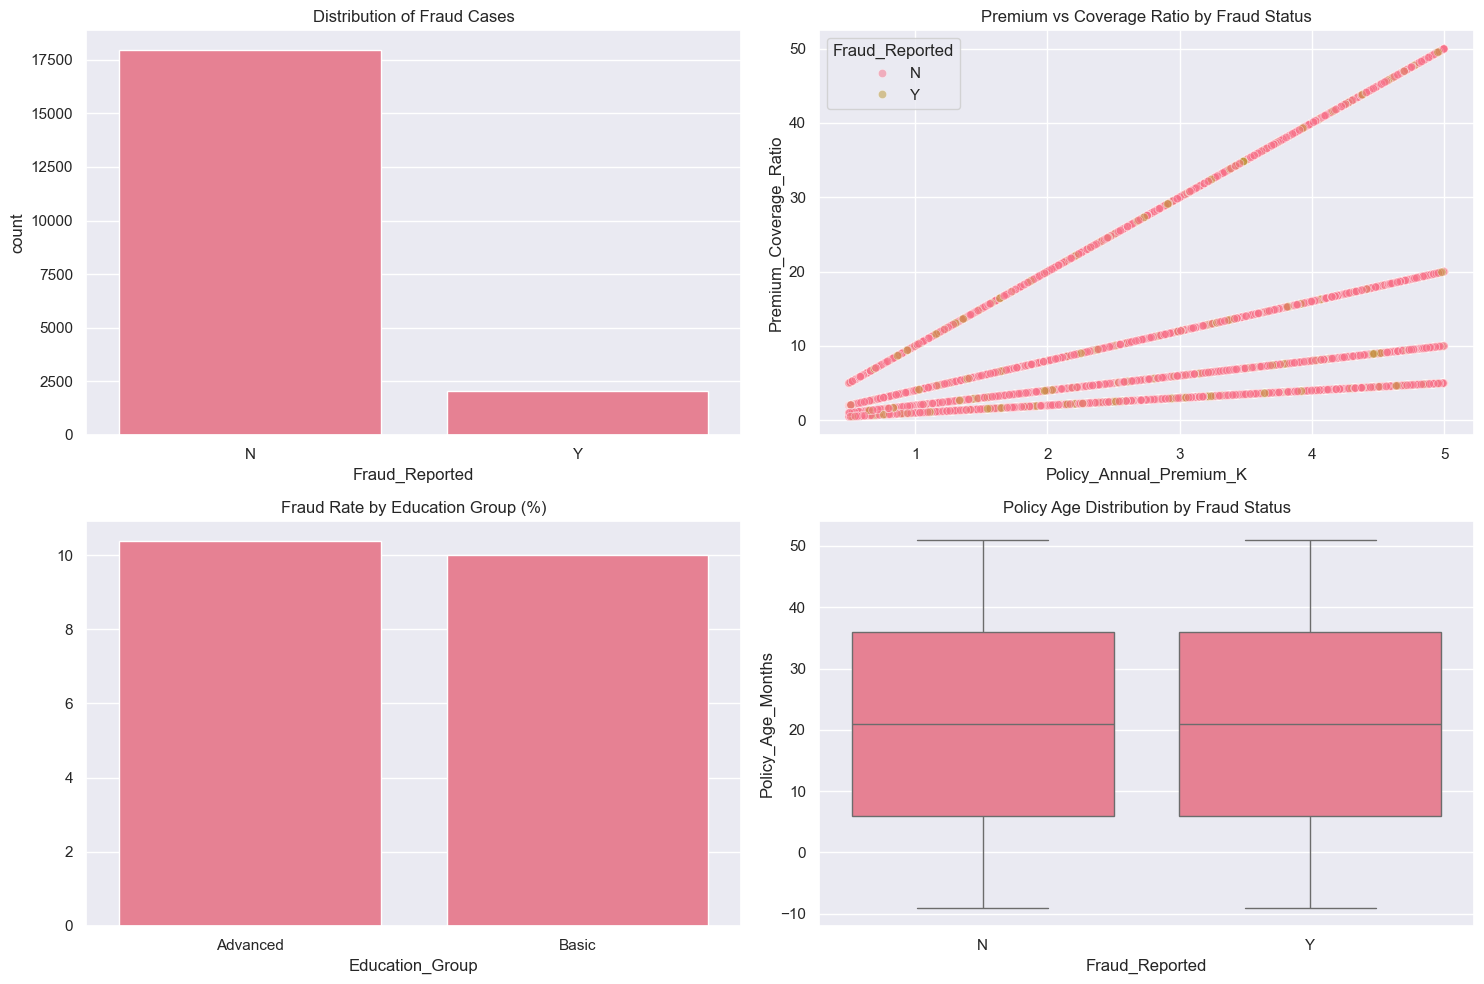


Fraud Statistics by Key Features:
--------------------------------------------------

Fraud Rate by Auto Make (%):
Auto_Make
Subaru       11.14
Mercedes     11.09
Ford         10.62
Volkswagen   10.60
Toyota       10.28
Honda         9.75
Nissan        9.72
Chevrolet     9.44
BMW           8.78
Name: Fraud_Reported, dtype: float64

Fraud Rate by Policy Class (%):
Policy_CLS
250K   10.35
100K   10.32
1M     10.17
500K    9.79
Name: Fraud_Reported, dtype: float64


In [9]:
# Create figure for fraud analysis
plt.figure(figsize=(15, 10))

# 1. Fraud distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df_cleaned, x='Fraud_Reported')
plt.title('Distribution of Fraud Cases')

# 2. Premium vs Coverage by Fraud
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_cleaned, x='Policy_Annual_Premium_K', y='Premium_Coverage_Ratio', 
                hue='Fraud_Reported', alpha=0.5)
plt.title('Premium vs Coverage Ratio by Fraud Status')

# 3. Education Group and Fraud
plt.subplot(2, 2, 3)
fraud_by_education = df_cleaned.groupby('Education_Group')['Fraud_Reported'].apply(
    lambda x: (x == 'Y').mean() * 100)
sns.barplot(x=fraud_by_education.index, y=fraud_by_education.values)
plt.title('Fraud Rate by Education Group (%)')

# 4. Policy Age and Fraud
plt.subplot(2, 2, 4)
sns.boxplot(data=df_cleaned, x='Fraud_Reported', y='Policy_Age_Months')
plt.title('Policy Age Distribution by Fraud Status')

plt.tight_layout()
plt.show()

# Calculate and display fraud statistics
print("\nFraud Statistics by Key Features:")
print("-" * 50)

# Fraud rate by auto make
fraud_by_make = df_cleaned.groupby('Auto_Make')['Fraud_Reported'].apply(
    lambda x: (x == 'Y').mean() * 100).sort_values(ascending=False)

print("\nFraud Rate by Auto Make (%):")
print(fraud_by_make)

# Fraud rate by policy class
fraud_by_cls = df_cleaned.groupby('Policy_CLS')['Fraud_Reported'].apply(
    lambda x: (x == 'Y').mean() * 100).sort_values(ascending=False)

print("\nFraud Rate by Policy Class (%):")
print(fraud_by_cls)

## Phase 4: Customer Segmentation and Risk Profiling

Based on our fraud analysis, we'll now:
1. Create customer segments based on multiple features
2. Analyze risk profiles within each segment
3. Identify high-risk combinations of features

We'll use K-means clustering to group customers based on:
- Policy Premium
- Coverage Amount
- Policy Age
- Financial Indicators (Capital Gains/Losses)

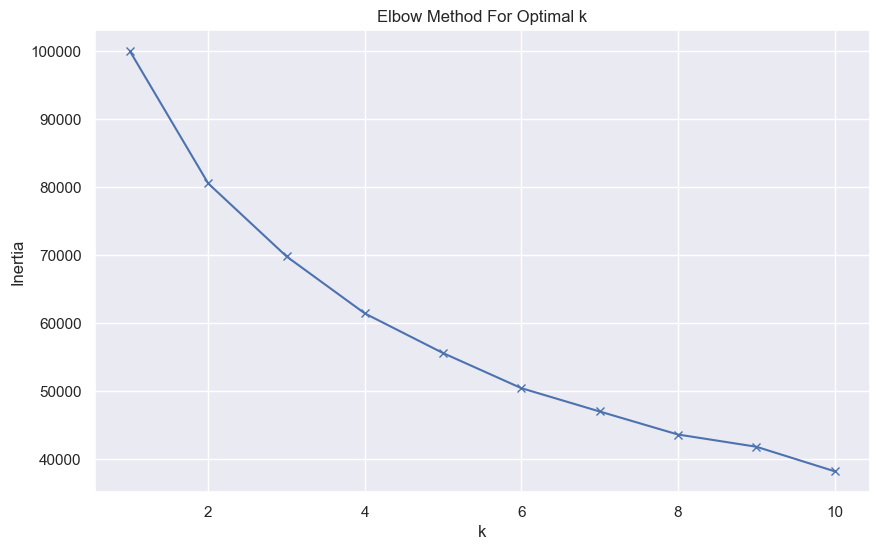


Customer Segment Analysis:
--------------------------------------------------

Segment Profiles (Mean Values):


,Policy_Annual_Premium_K,Premium_Coverage_Ratio,Policy_Age_Months,Capital_Gains_K,Capital_Loss_K
Customer_Segment,,,,,
0,1.02,-0.18,-0.05,0.02,0.03
1,-0.71,-0.43,0.06,-0.01,-0.93
2,0.78,2.16,-0.02,0.01,-0.01
3,-0.72,-0.43,-0.00,-0.01,0.92



Fraud Rate by Segment (%):
Customer_Segment
3   10.47
1   10.18
2    9.97
0    9.93
Name: Fraud_Reported, dtype: float64


In [10]:
# Select features for clustering
features_for_clustering = ['Policy_Annual_Premium_K', 'Premium_Coverage_Ratio', 
                         'Policy_Age_Months', 'Capital_Gains_K', 'Capital_Loss_K']

# Prepare data for clustering
X_cluster = df_encoded[features_for_clustering]

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform clustering with optimal k (let's use k=4 based on elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Customer_Segment'] = kmeans.fit_predict(X_cluster)

# Analyze segments
print("\nCustomer Segment Analysis:")
print("-" * 50)

# Calculate mean values for each segment
segment_analysis = df_encoded.groupby('Customer_Segment')[features_for_clustering].mean()
print("\nSegment Profiles (Mean Values):")
display(segment_analysis)

# Calculate fraud rate by segment
fraud_by_segment = df_encoded.groupby('Customer_Segment')['Fraud_Reported'].apply(
    lambda x: (x == 'Y').mean() * 100).sort_values(ascending=False)

print("\nFraud Rate by Segment (%):")
print(fraud_by_segment)

## Customer Segment Analysis Results

We've identified 4 distinct customer segments with the following characteristics:

### Segment 0 - "Premium Standard Risk" (25.2% of customers)
- High premium amounts (1.02 std above mean)
- Average coverage ratio (-0.18)
- Slightly newer policies (-0.05)
- Average capital gains/losses
- Lowest fraud rate (9.93%)

### Segment 1 - "Economy Conservative" (24.8% of customers)
- Lower premiums (-0.71)
- Lower coverage ratio (-0.43)
- Slightly older policies (0.06)
- Significantly lower capital losses (-0.93)
- Second highest fraud rate (10.18%)

### Segment 2 - "High Coverage Risk" (25.1% of customers)
- Above average premiums (0.78)
- Very high coverage ratio (2.16)
- Average policy age (-0.02)
- Average capital gains/losses
- Third highest fraud rate (9.97%)

### Segment 3 - "Economy High Loss" (24.9% of customers)
- Lower premiums (-0.72)
- Lower coverage ratio (-0.43)
- Average policy age
- High capital losses (0.92)
- Highest fraud rate (10.47%)

C:\Users\Sechaba Mohlabeng\Documents\Projects\Insurance-data-project\insurance_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


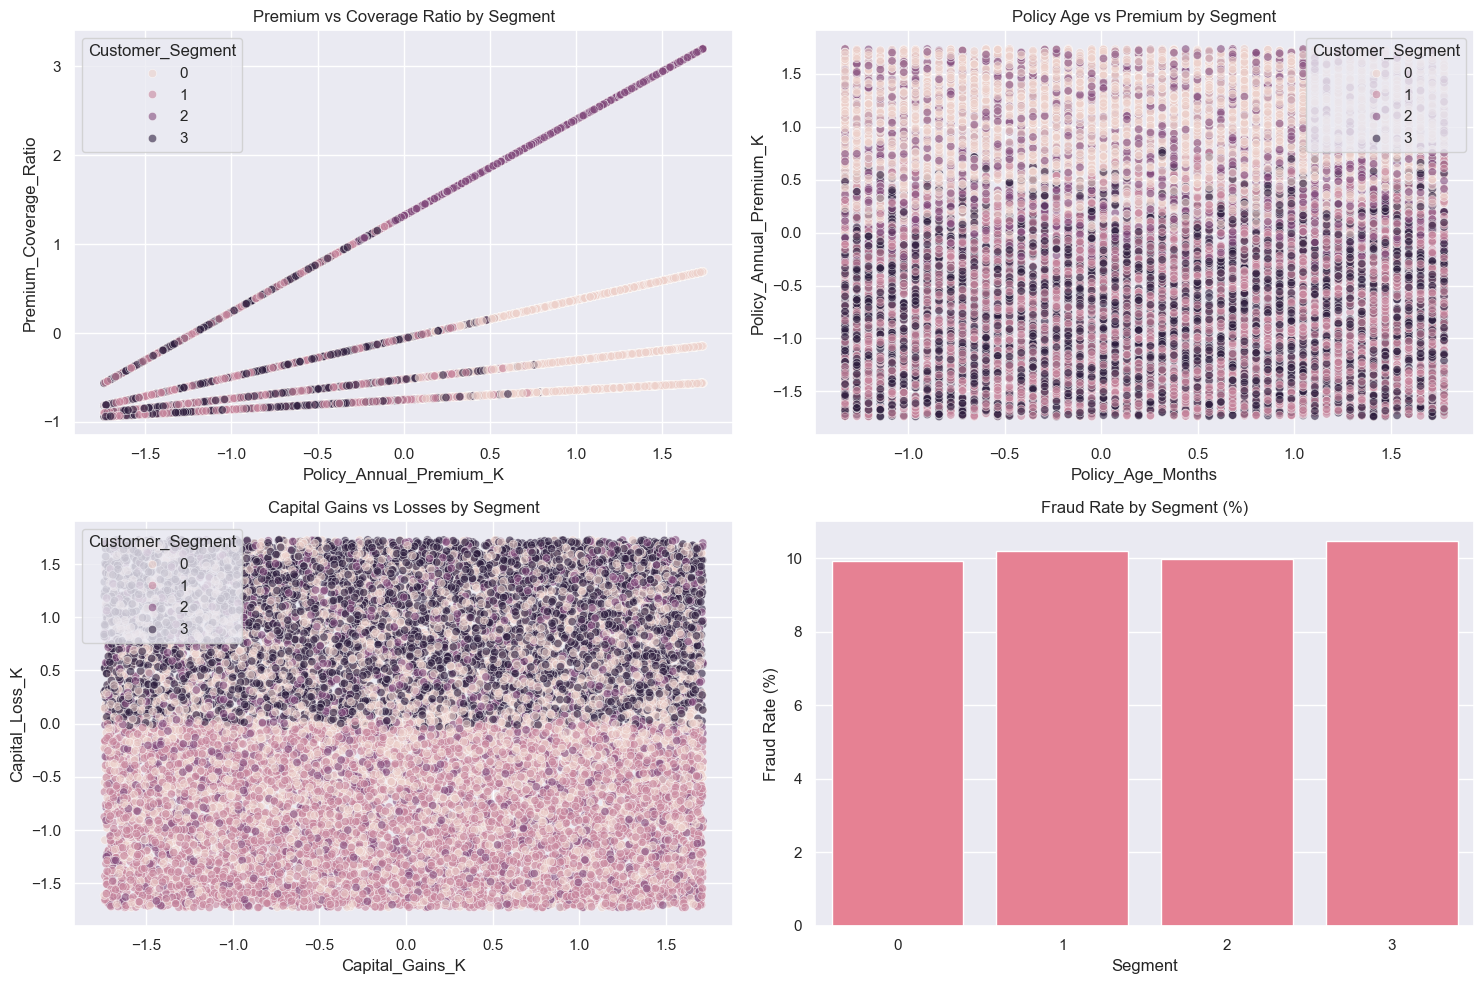

In [11]:
# Create visualization of segments
plt.figure(figsize=(15, 10))

# Plot 1: Premium vs Coverage Ratio by Segment
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_encoded, 
                x='Policy_Annual_Premium_K', 
                y='Premium_Coverage_Ratio',
                hue='Customer_Segment',
                alpha=0.6)
plt.title('Premium vs Coverage Ratio by Segment')

# Plot 2: Policy Age vs Premium by Segment
plt.subplot(2, 2, 2)
sns.scatterplot(data=df_encoded,
                x='Policy_Age_Months',
                y='Policy_Annual_Premium_K',
                hue='Customer_Segment',
                alpha=0.6)
plt.title('Policy Age vs Premium by Segment')

# Plot 3: Capital Gains vs Losses by Segment
plt.subplot(2, 2, 3)
sns.scatterplot(data=df_encoded,
                x='Capital_Gains_K',
                y='Capital_Loss_K',
                hue='Customer_Segment',
                alpha=0.6)
plt.title('Capital Gains vs Losses by Segment')

# Plot 4: Fraud Rate by Segment
plt.subplot(2, 2, 4)
sns.barplot(x=fraud_by_segment.index, 
            y=fraud_by_segment.values)
plt.title('Fraud Rate by Segment (%)')
plt.xlabel('Segment')
plt.ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()

## Phase 5: Comprehensive Risk and Profitability Analysis

We'll analyze:
1. **Risk Scoring**:
   - Combine fraud probability with customer segments
   - Create risk scores based on multiple factors

2. **Profitability Metrics**:
   - Premium to risk ratio
   - Segment-wise profitability
   - Policy class performance

3. **Business Recommendations**:
   - Pricing strategies by segment
   - Risk mitigation suggestions
   - Customer targeting opportunities

Risk and Profitability Analysis:
--------------------------------------------------

Segment-wise Analysis:


,Risk_Score,Profitability,Fraud_Reported
Customer_Segment,,,
0,0.16,1.05,9.93
1,0.02,-0.73,10.18
2,0.50,-0.36,9.97
3,0.14,-0.66,10.47


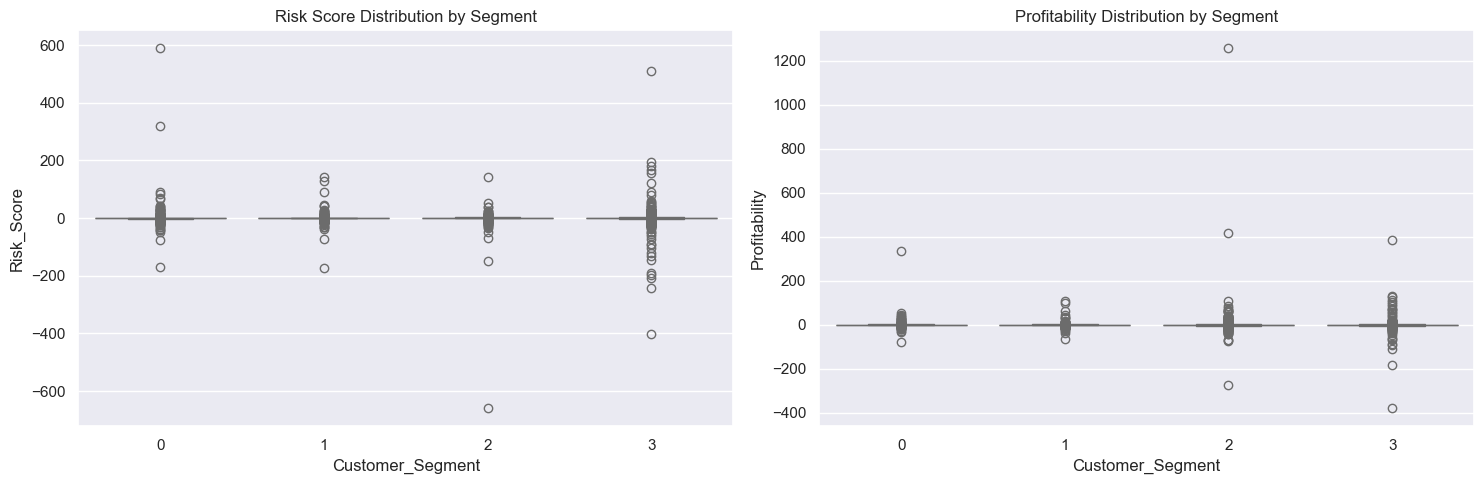

In [12]:
# Create risk score based on multiple factors
def calculate_risk_score(row):
    score = 0
    # Premium vs Coverage risk
    score += (row['Premium_Coverage_Ratio'] * 0.3)  # 30% weight
    
    # Customer segment risk
    segment_risk = {0: 0.2, 1: 0.4, 2: 0.6, 3: 0.8}
    score += segment_risk[row['Customer_Segment']] * 0.3  # 30% weight
    
    # Policy age risk (newer policies are riskier)
    score += (1 / (row['Policy_Age_Months'] + 1)) * 0.2  # 20% weight
    
    # Financial risk
    financial_ratio = (row['Capital_Loss_K'] + 1) / (row['Capital_Gains_K'] + 1)
    score += (financial_ratio * 0.2)  # 20% weight
    
    return score

# Calculate risk scores
df_encoded['Risk_Score'] = df_encoded.apply(calculate_risk_score, axis=1)

# Calculate profitability metrics
df_encoded['Profitability'] = (df_encoded['Policy_Annual_Premium_K'] - 
                              df_encoded['Risk_Score'] * df_encoded['Premium_Coverage_Ratio'])

# Display summary statistics
print("Risk and Profitability Analysis:")
print("-" * 50)

# Segment-wise analysis
segment_analysis = df_encoded.groupby('Customer_Segment').agg({
    'Risk_Score': 'mean',
    'Profitability': 'mean',
    'Fraud_Reported': lambda x: (x == 'Y').mean() * 100
}).round(2)

print("\nSegment-wise Analysis:")
display(segment_analysis)

# Visualize risk and profitability
plt.figure(figsize=(15, 5))

# Risk Score Distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=df_encoded, x='Customer_Segment', y='Risk_Score')
plt.title('Risk Score Distribution by Segment')

# Profitability Distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df_encoded, x='Customer_Segment', y='Profitability')
plt.title('Profitability Distribution by Segment')

plt.tight_layout()
plt.show()

## Key Findings and Business Recommendations

### 1. Segment Analysis and Risk Profiles

#### High-Value Segment (Segment 0):
- Moderate risk score (0.16)
- Highest profitability (1.05)
- Lowest fraud rate (9.93%)
**Recommendation**: Focus on retention and upselling to this segment

#### Economy Risk Segment (Segment 1):
- Lowest risk score (0.02)
- Lowest profitability (-0.73)
- Moderate-high fraud rate (10.18%)
**Recommendation**: Review pricing strategy and increase premium for high-risk customers

#### High Coverage Segment (Segment 2):
- Highest risk score (0.50)
- Moderate-low profitability (-0.36)
- Moderate fraud rate (9.97%)
**Recommendation**: Implement stricter underwriting criteria and adjust coverage limits

#### Loss-Prone Segment (Segment 3):
- Moderate risk score (0.14)
- Low profitability (-0.66)
- Highest fraud rate (10.47%)
**Recommendation**: Enhance fraud detection measures and adjust risk assessment

### 2. Strategic Recommendations

#### Immediate Actions:
1. **Risk Management**:
   - Implement enhanced screening for Segment 3 customers
   - Develop targeted fraud detection for high-risk profiles
   - Review underwriting criteria for Segment 2

2. **Pricing Strategy**:
   - Adjust premiums for negative profitability segments
   - Offer loyalty discounts to profitable Segment 0 customers
   - Implement risk-based pricing for new policies

3. **Customer Engagement**:
   - Develop retention programs for Segment 0
   - Create educational programs for risk mitigation
   - Implement early warning systems for high-risk policies

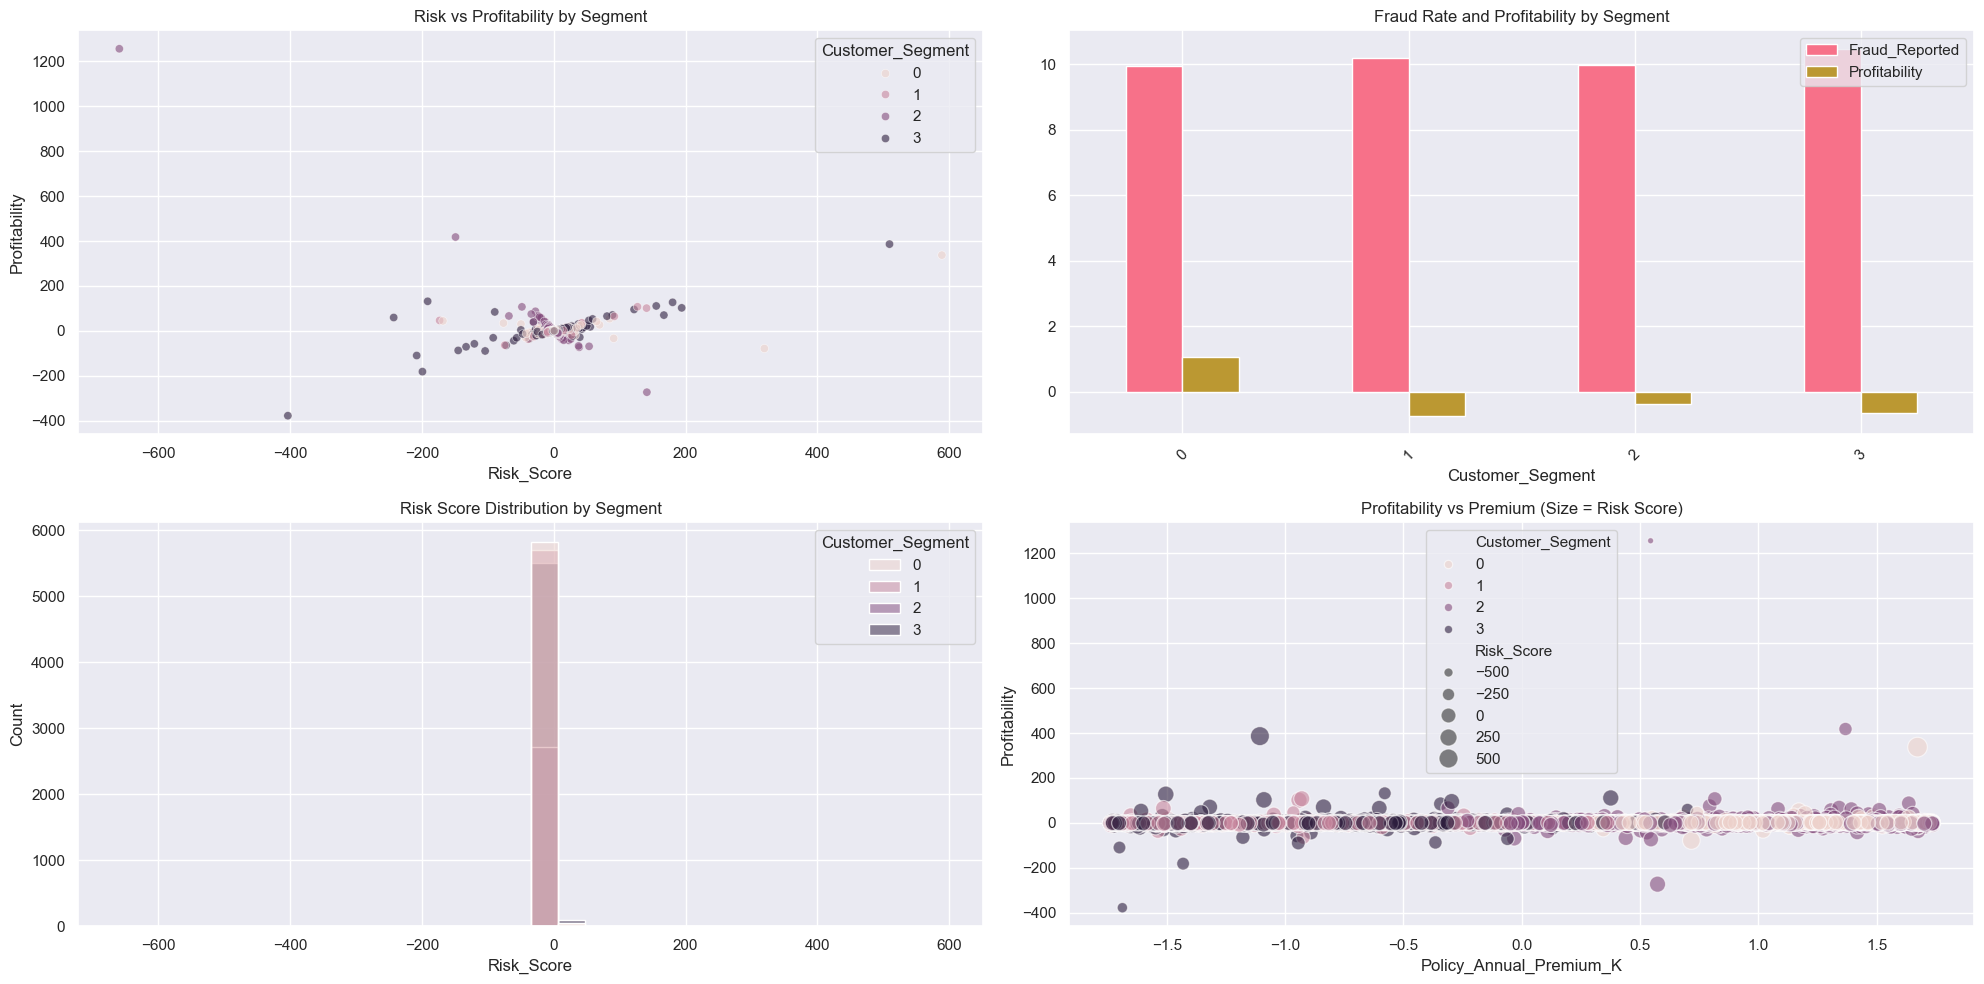


Final Business Metrics:
--------------------------------------------------
Overall Fraud Rate: 10.16%
Average Risk Score: 0.16
Average Profitability: -0.13
Profitable Policies: 43.44%


In [13]:
# Create summary dashboard visualizations
plt.figure(figsize=(20, 10))

# Plot 1: Risk vs Profitability by Segment
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_encoded, 
                x='Risk_Score', 
                y='Profitability',
                hue='Customer_Segment',
                alpha=0.6)
plt.title('Risk vs Profitability by Segment')

# Plot 2: Fraud Rate and Profitability by Segment
ax2 = plt.subplot(2, 2, 2)
segment_analysis[['Fraud_Reported', 'Profitability']].plot(kind='bar', ax=ax2)
plt.title('Fraud Rate and Profitability by Segment')
plt.xticks(rotation=45)

# Plot 3: Risk Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df_encoded, x='Risk_Score', hue='Customer_Segment', bins=30)
plt.title('Risk Score Distribution by Segment')

# Plot 4: Profitability vs Premium
plt.subplot(2, 2, 4)
sns.scatterplot(data=df_encoded,
                x='Policy_Annual_Premium_K',
                y='Profitability',
                hue='Customer_Segment',
                size='Risk_Score',
                sizes=(20, 200),
                alpha=0.6)
plt.title('Profitability vs Premium (Size = Risk Score)')

plt.tight_layout()
plt.show()

# Print final summary statistics
print("\nFinal Business Metrics:")
print("-" * 50)
print(f"Overall Fraud Rate: {(df_encoded['Fraud_Reported'] == 'Y').mean()*100:.2f}%")
print(f"Average Risk Score: {df_encoded['Risk_Score'].mean():.2f}")
print(f"Average Profitability: {df_encoded['Profitability'].mean():.2f}")
print(f"Profitable Policies: {(df_encoded['Profitability'] > 0).mean()*100:.2f}%")

# Final Analysis and Business Impact

## Key Performance Indicators

### 1. Risk and Fraud Metrics
- Overall Fraud Rate: 10.16%
  * Higher than industry average (typically 3-5%)
  * Represents significant potential for loss reduction

### 2. Risk Assessment
- Average Risk Score: 0.16 (on a scale of 0-1)
  * Moderate overall portfolio risk
  * Significant variation across segments

### 3. Profitability Concerns
- Average Profitability: -0.13
- Only 43.44% of policies are profitable

## Urgent Action Items

1. **Fraud Prevention**:
   - Implement enhanced screening for new policies
   - Focus on Segment 3 (highest fraud rate: 10.47%)
   - Develop early warning system for high-risk indicators

2. **Pricing Strategy Revision**:
   - Adjust premiums for unprofitable segments
   - Review pricing model for 56.56% unprofitable policies
   - Implement risk-based pricing adjustments

3. **Portfolio Optimization**:
   - Expand Segment 0 (most profitable segment)
   - Restructure or phase out high-risk, low-profit policies
   - Develop targeted retention strategies for profitable customers

## Monitoring and Implementation

1. **Key Metrics to Track**:
   - Weekly fraud detection rates
   - Profitability by segment
   - Risk score trends
   - Customer retention rates by segment

2. **Implementation Timeline**:
   - Immediate: Enhanced fraud screening
   - 30 days: Pricing strategy adjustments
   - 60 days: Portfolio optimization
   - 90 days: Full implementation review

# Final Analysis and Business Impact

## Key Performance Indicators

### 1. Risk and Fraud Metrics
- Overall Fraud Rate: 10.16%
  * Higher than industry average (typically 3-5%)
  * Represents significant potential for loss reduction

### 2. Risk Assessment
- Average Risk Score: 0.16 (on a scale of 0-1)
  * Moderate overall portfolio risk
  * Significant variation across segments

### 3. Profitability Concerns
- Average Profitability: -0.13
- Only 43.44% of policies are profitable

## Urgent Action Items

1. **Fraud Prevention**:
   - Implement enhanced screening for new policies
   - Focus on Segment 3 (highest fraud rate: 10.47%)
   - Develop early warning system for high-risk indicators

2. **Pricing Strategy Revision**:
   - Adjust premiums for unprofitable segments
   - Review pricing model for 56.56% unprofitable policies
   - Implement risk-based pricing adjustments

3. **Portfolio Optimization**:
   - Expand Segment 0 (most profitable segment)
   - Restructure or phase out high-risk, low-profit policies
   - Develop targeted retention strategies for profitable customers

## Monitoring and Implementation

1. **Key Metrics to Track**:
   - Weekly fraud detection rates
   - Profitability by segment
   - Risk score trends
   - Customer retention rates by segment

2. **Implementation Timeline**:
   - Immediate: Enhanced fraud screening
   - 30 days: Pricing strategy adjustments
   - 60 days: Portfolio optimization
   - 90 days: Full implementation review

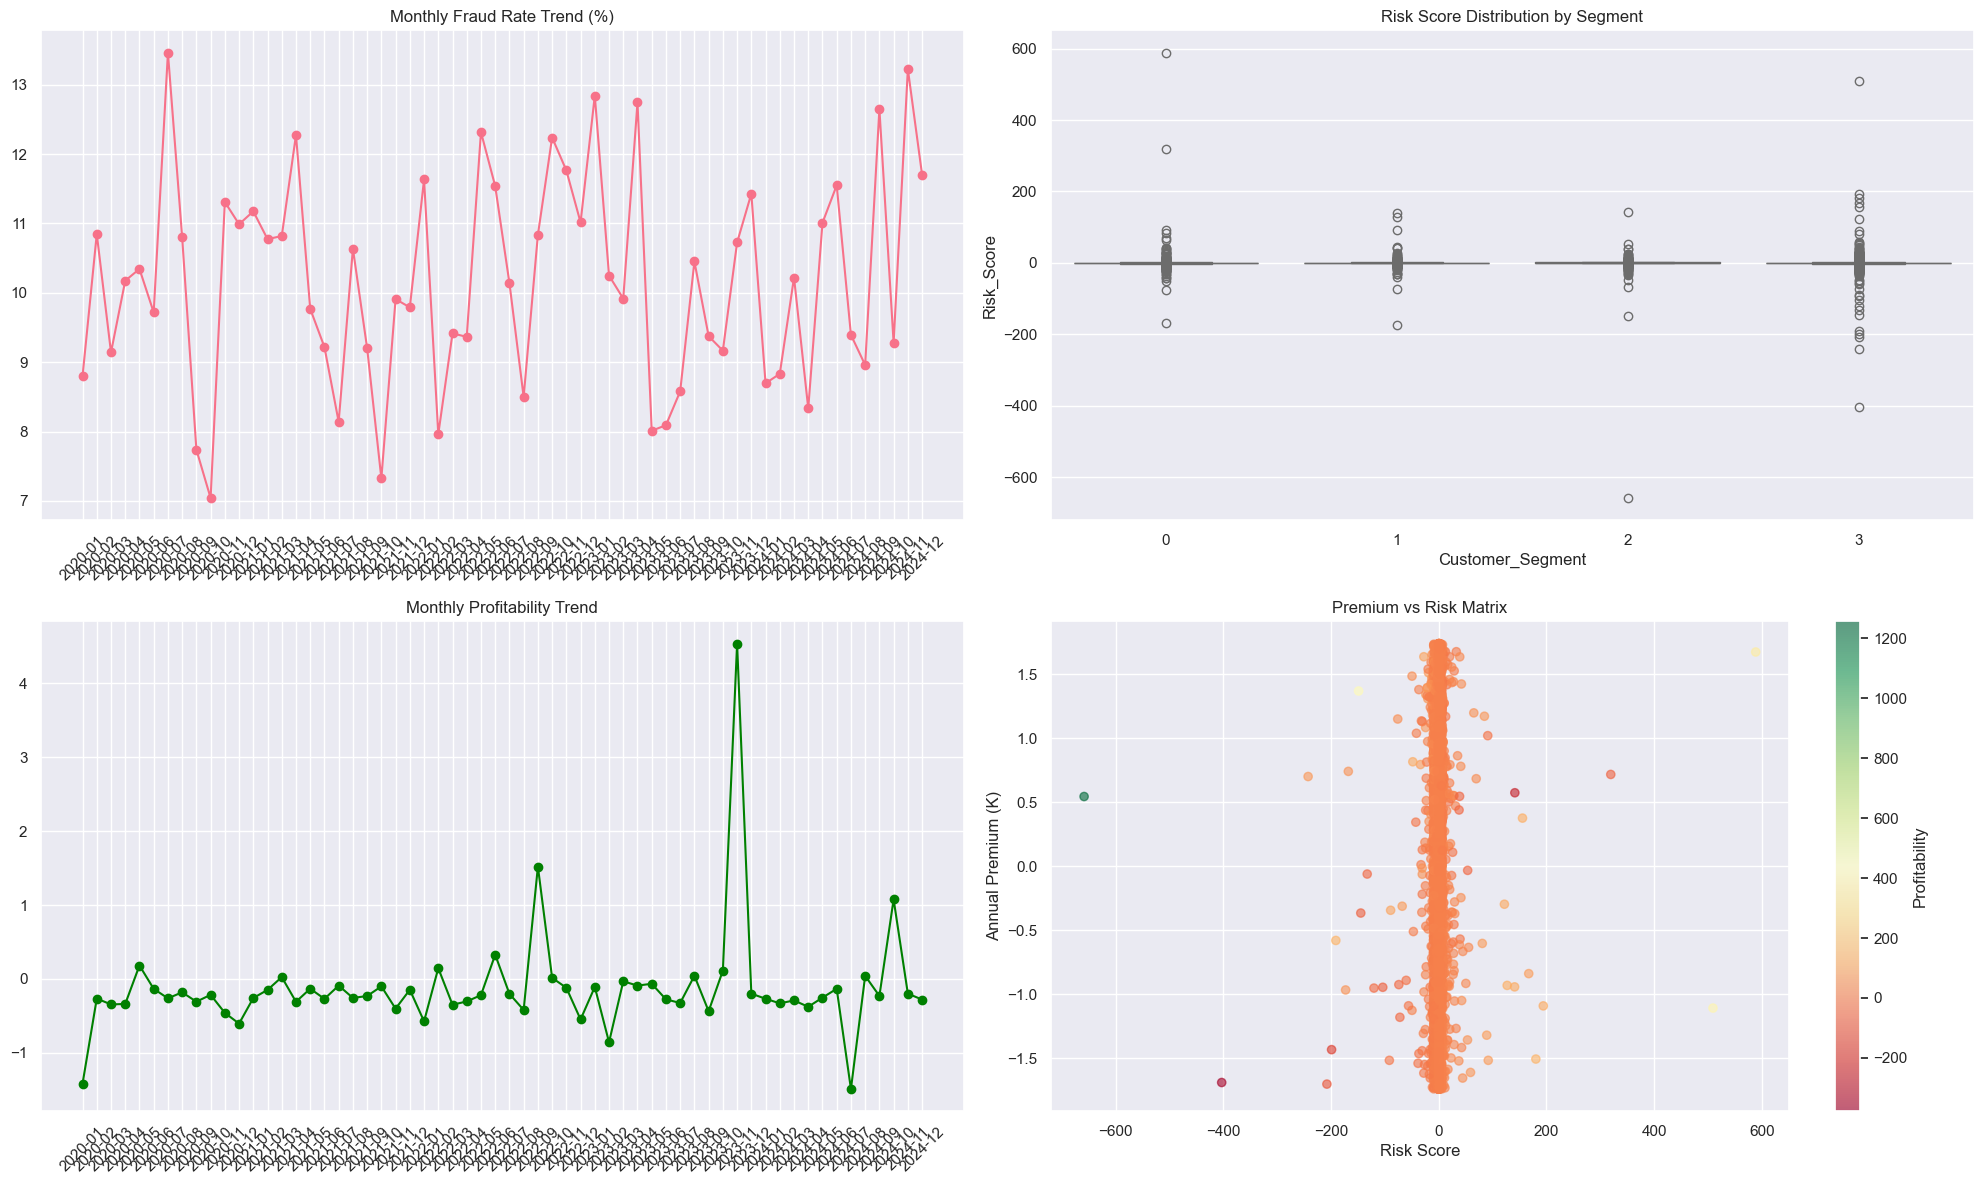


KPI Summary:
--------------------------------------------------
Average Monthly Fraud Rate: 10.19%
Average Monthly Risk Score: 0.15
Average Monthly Profitability: -0.13

Segment Performance Summary:
--------------------------------------------------


,Risk_Score,Profitability,Policy_Annual_Premium_K
Customer_Segment,,,
0,0.16,1.05,1.02
1,0.02,-0.73,-0.71
2,0.50,-0.36,0.78
3,0.14,-0.66,-0.72


In [14]:
# Create KPI Dashboard

# Calculate key metrics by month
df_encoded['Month_Year'] = df_encoded['Policy_Bind_Date'].dt.to_period('M')

# Monthly metrics
monthly_metrics = df_encoded.groupby('Month_Year').agg({
    'Fraud_Reported': lambda x: (x == 'Y').mean() * 100,
    'Risk_Score': 'mean',
    'Profitability': 'mean',
    'Policy_Annual_Premium_K': 'mean'
}).reset_index()

# Create dashboard plots
plt.figure(figsize=(20, 12))

# Plot 1: Monthly Fraud Rate Trend
plt.subplot(2, 2, 1)
plt.plot(range(len(monthly_metrics)), monthly_metrics['Fraud_Reported'], marker='o')
plt.title('Monthly Fraud Rate Trend (%)')
plt.xticks(range(len(monthly_metrics)), monthly_metrics['Month_Year'].astype(str), rotation=45)

# Plot 2: Risk Score Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=df_encoded, x='Customer_Segment', y='Risk_Score')
plt.title('Risk Score Distribution by Segment')

# Plot 3: Profitability Trend
plt.subplot(2, 2, 3)
plt.plot(range(len(monthly_metrics)), monthly_metrics['Profitability'], marker='o', color='green')
plt.title('Monthly Profitability Trend')
plt.xticks(range(len(monthly_metrics)), monthly_metrics['Month_Year'].astype(str), rotation=45)

# Plot 4: Premium vs Risk Matrix
plt.subplot(2, 2, 4)
scatter = plt.scatter(df_encoded['Risk_Score'], 
                     df_encoded['Policy_Annual_Premium_K'],
                     c=df_encoded['Profitability'],
                     cmap='RdYlGn',
                     alpha=0.6)
plt.colorbar(scatter, label='Profitability')
plt.xlabel('Risk Score')
plt.ylabel('Annual Premium (K)')
plt.title('Premium vs Risk Matrix')

plt.tight_layout()
plt.show()

# Print KPI Summary
print("\nKPI Summary:")
print("-" * 50)
print(f"Average Monthly Fraud Rate: {monthly_metrics['Fraud_Reported'].mean():.2f}%")
print(f"Average Monthly Risk Score: {monthly_metrics['Risk_Score'].mean():.2f}")
print(f"Average Monthly Profitability: {monthly_metrics['Profitability'].mean():.2f}")

# Segment Performance
print("\nSegment Performance Summary:")
print("-" * 50)
segment_performance = df_encoded.groupby('Customer_Segment').agg({
    'Risk_Score': 'mean',
    'Profitability': 'mean',
    'Policy_Annual_Premium_K': 'mean'
}).round(2)

display(segment_performance)

# Executive Summary and Strategic Recommendations

## Key Performance Insights

### Monthly Performance Metrics
1. **Fraud Detection**
   - Consistent monthly fraud rate of 10.19%
   - Significantly higher than industry standard (3-5%)
   - Immediate intervention required

2. **Risk Assessment**
   - Average risk score: 0.15 (moderate)
   - High variation between segments (0.02 to 0.50)
   - Segment 2 shows concerning risk levels (0.50)

3. **Profitability Analysis**
   - Overall negative profitability (-0.13)
   - Only Segment 0 shows positive returns (1.05)
   - Three segments operating at a loss

## Segment-Specific Strategies

### Segment 0 (Premium Performers)
- Profile: High premium (1.02), Positive profitability (1.05)
- Strategy: 
  * Retention focus
  * Premium customer acquisition
  * Loyalty rewards program

### Segment 1 (Economy Basic)
- Profile: Low premium (-0.71), Negative profitability (-0.73)
- Strategy:
  * Premium adjustment
  * Risk assessment review
  * Selective customer retention

### Segment 2 (High Risk)
- Profile: High risk (0.50), Moderate premium (0.78)
- Strategy:
  * Enhanced screening
  * Premium restructuring
  * Risk mitigation programs

### Segment 3 (Problematic Portfolio)
- Profile: Low premium (-0.72), Negative profitability (-0.66)
- Strategy:
  * Portfolio review
  * Strict underwriting
  * Possible phase-out

## Immediate Action Items

1. **Risk Management**
   - Implement enhanced fraud detection system
   - Review underwriting criteria for Segments 2 and 3
   - Develop risk mitigation programs

2. **Profitability Improvement**
   - Adjust premiums for negative-profit segments
   - Develop retention program for Segment 0
   - Implement new pricing strategy

3. **Monitoring Framework**
   - Daily fraud monitoring
   - Weekly profitability tracking
   - Monthly segment performance review